# Plot Data cdg dynamics Caulobacter crescentus 

---

## Import packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(7,9))

import seaborn as sns
import pathlib

plt.rcParams.update({'font.size': 9})
sns.set(font="Arial")

---

## Load Data

We load the data created with the `1_filter_data_Cc` notebook.

In [2]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas')
image_dir = proj_dir / 'figures_Cc'

#load data frame
df_name = pathlib.Path() / 'data_files' / 'filtered_data_Cc.csv'
df = pd.read_csv(df_name, index_col=0)
df.reset_index(drop=True)

#add time in minutes
df['time since birth [min]'] = df['age'] * 5
df['cdg ratio'] = df['rel_cdg_hl'] #rename column

---

## Bar plot of relative CDG levels 

/Users/simonvanvliet/miniconda/miniconda3/envs/cdg_env/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


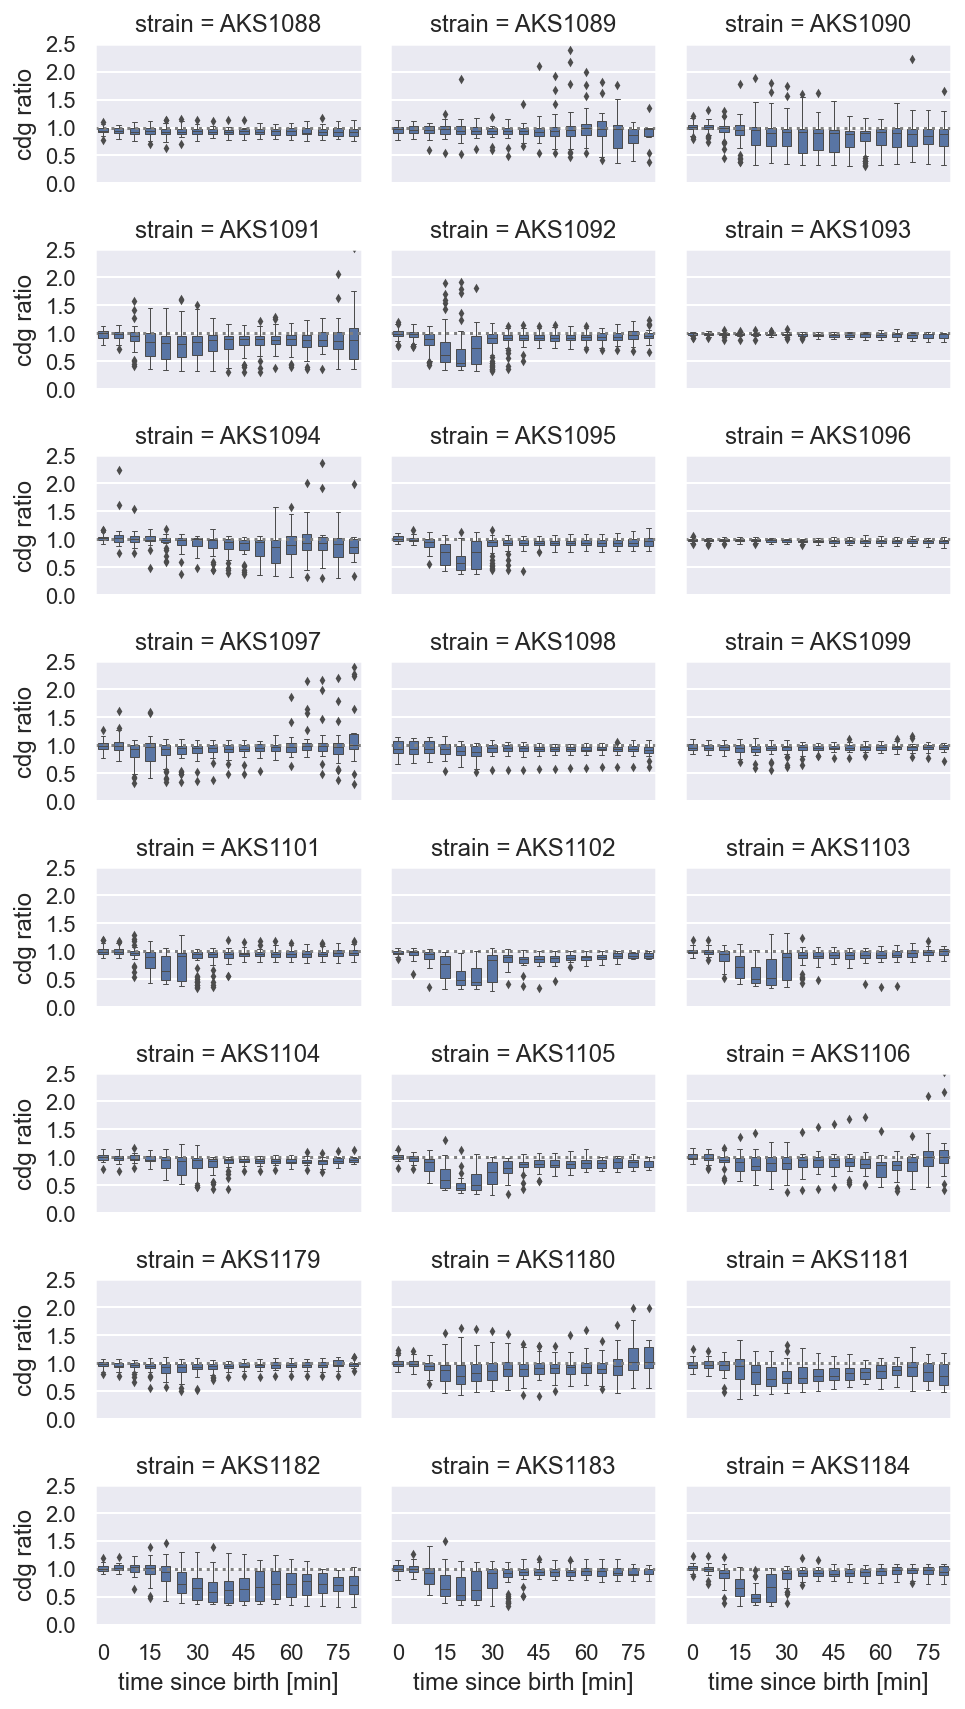

In [3]:
# Initialize a grid of plots with an Axes for each strain
g = sns.FacetGrid(data=df[df['age']<17], col="strain", 
                  col_wrap=3, height=1.5, aspect=1.5,
                  ylim=(0,2.5), palette="colorblind", despine=False)

# Draw a horizontal reference line
g.refline(y=1, linestyle=":")

# Make box plot
flierprops = dict(markersize=2, linestyle='none')
g.map(sns.boxplot, "time since birth [min]", "cdg ratio", flierprops=flierprops, width=0.6, linewidth=0.5)

# Adjust the arrangement of the plots
g.fig.tight_layout(w_pad=1)
g.set(yticks=[0, 0.5, 1 , 1.5, 2, 2.5])

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels        
    for label in ax.get_xticklabels():    
        if int(label.get_text()) % 15 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
            
im_name = image_dir / 'cdg_ratio_boxplot_Cc.svg'
g.savefig(im_name)

---

## Line plot of absolute CDG levels 

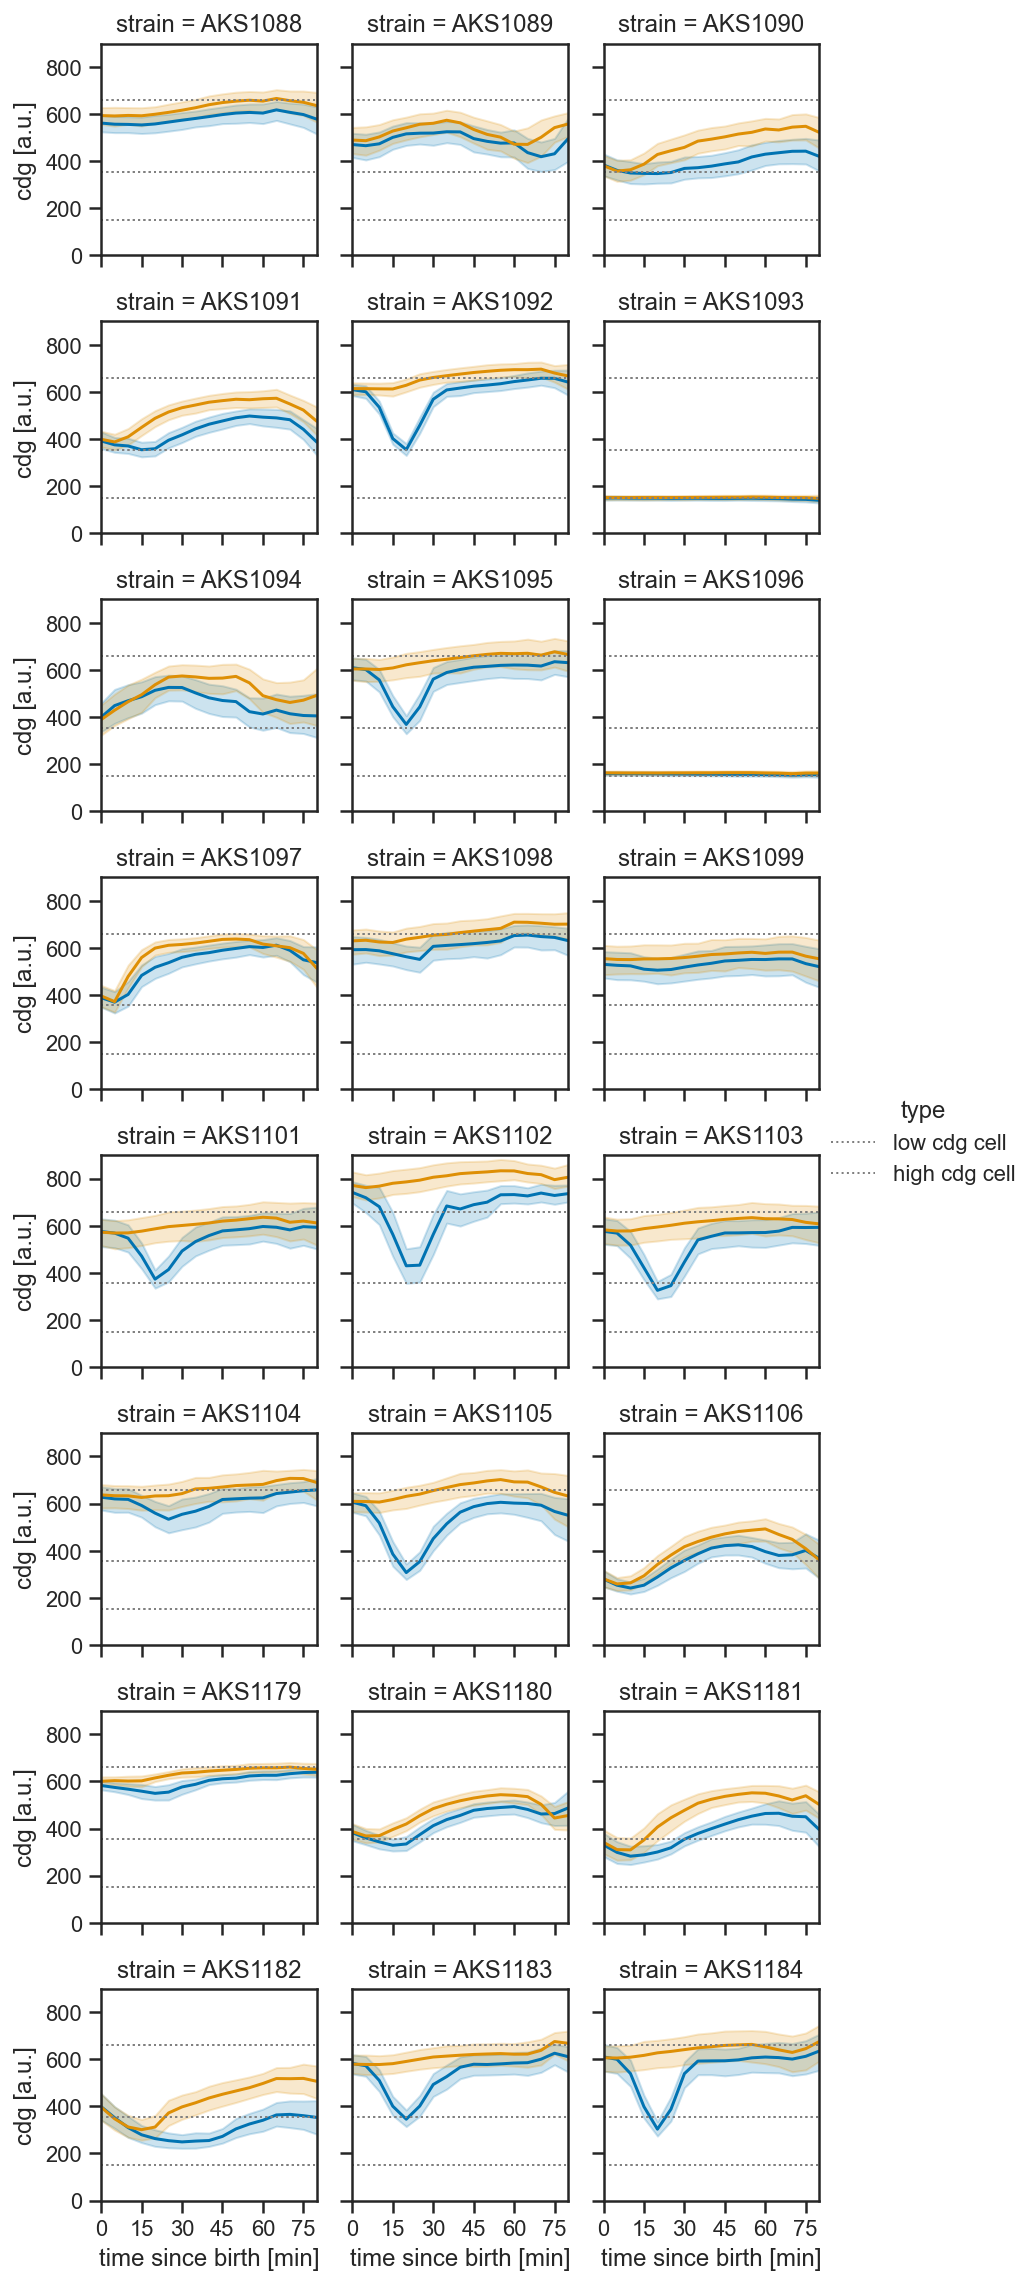

In [39]:
sns.set_style("ticks")
maxT = 80
df_trim = df[df['time since birth [min]'] <= maxT]

#restructure data frame in long format, adding cdg-type as categorical class variable 
df1 = df_trim[['strain','time since birth [min]','cdg_dh']].copy()
df1['type'] = 'high cdg cell'
df1['cdg [a.u.]'] = df1['cdg_dh']

df2 = df_trim[['strain','time since birth [min]','cdg_dl']].copy()
df2['type'] = 'low cdg cell'
df2['cdg [a.u.]'] = df2['cdg_dl']

df_hvl = pd.concat((df1, df2),keys=['strain','time since birth [min]','cdg','type']).reset_index()

#get reference levels
cdg_high = df_trim[df_trim['strain']=='AKS1092']['cdg_dh'].mean()
cdg_low = df_trim[df_trim['strain']=='AKS1092'].groupby('age').mean()['cdg_dl'].min()

cdg_zero = np.mean([df_trim[df_trim['strain']=='AKS1093']['cdg_dh'].mean(), 
                    df_trim[df_trim['strain']=='AKS1093']['cdg_dl'].mean()])

#create grid by strain
g = sns.FacetGrid(data=df_hvl, col="strain", hue='type', 
                  col_wrap=3, height=2, 
                  aspect=1, xlim=(0,maxT), ylim=(0,900),
                  palette="colorblind", 
                  hue_order=['low cdg cell', 'high cdg cell'],
                  despine=False)

# Draw a line plot of cdg levels
g.map(sns.lineplot, "time since birth [min]", "cdg [a.u.]")
g.refline(y=cdg_high,linestyle=':',color='grey',linewidth=1)
g.refline(y=cdg_low,linestyle=':',color='grey',linewidth=1)
g.refline(y=cdg_zero,linestyle=':',color='grey',linewidth=1)

# Adjust the arrangement of the plots
g.fig.tight_layout(w_pad=1)
g.set(xticks=[0,15,30,45,60,75],yticks=[0,200,400,600,800])
g.add_legend()

im_name = image_dir / 'cdg_absolute_levels_Cc.svg'
g.savefig(im_name)